In [6]:
import pandas as pd 
import matplotlib as mpl
import numpy as np

# reading and storing data
data = pd.read_csv('credit_card_fraud.csv', parse_dates=['trans_date_trans_time',])


In [8]:
# getting rid of columns not needed
#data = data.drop(['trans_num'], axis = 1)

data['hour_of_transaction'] = data.trans_date_trans_time.dt.hour
data.tail()

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,hour_of_transaction
339602,2020-12-31 23:57:56,Schmidt-Larkin,home,12.68,Wales,AK,64.7556,-165.6723,145,"Administrator, education",1939-11-09,65.623593,-165.186033,0,23
339603,2020-12-31 23:58:04,"Pouros, Walker and Spence",kids_pets,13.02,Greenview,CA,41.5403,-122.9366,308,Call centre manager,1958-09-20,41.973127,-123.553032,0,23
339604,2020-12-31 23:59:07,Reilly and Sons,health_fitness,43.77,Luray,MO,40.4931,-91.8912,519,Town planner,1966-02-13,39.946837,-91.333331,0,23
339605,2020-12-31 23:59:15,Rau-Robel,kids_pets,86.88,Burbank,WA,46.1966,-118.9017,3684,Musician,1981-11-29,46.658340,-119.715054,0,23
339606,2020-12-31 23:59:24,Breitenberg LLC,travel,7.99,Mesa,ID,44.6255,-116.4493,129,Cartographer,1965-12-15,44.470525,-117.080888,0,23


CA                                                               80495
MO                                                               54904
NE                                                               34425
WY                                                               27776
WA                                                               27040
OR                                                               26408
NM                                                               23427
CO                                                               19766
AZ                                                               15362
UT                                                               15357
ID                                                                8035
HI                                                                3649
AK                                                                2963
state_fraud_count    CA    402
MO    262
NE    216
OR    197
WA    ...
Name: 

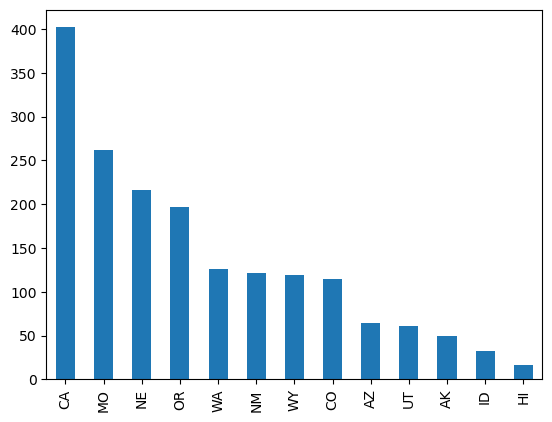

In [28]:
# States with the most fraud, and the percentage of fraud in those states
import matplotlib.pyplot as plt

fraud_states = data.query('is_fraud==1')['state']
fraud_counts = fraud_states.value_counts()
fraud_counts.plot.bar()

state_sample_count = data['state'].value_counts()
state_sample_count['state_fraud_count'] = fraud_counts
print(state_sample_count)

